# TRANSFERENCIAS DE RECURSOS A GOBERNACIONES (PREFECTURAS)
GESTIONES 2001 - 2019

En el presente documento, presentamos el análisis preliminar de los datos de transferencia de recursos a gobernaciones en las gestiones entre 2001 y 2019.

## Metodología

El presente análisis utiliza dados de datos de transferencia de recursos a gobernaciones en las gestiones entre 2001 y 2019. Los dados están agrupados por "conceptos" y departamentos de Bolivia: Chuquisaca, La Paz, Cochabamba, Oruro, Potosí, Santa Cruz, Beni y Pando.

Los "conceptos" utilizados para agrupar los datos son: IEHD, Fondo de compensación, IDH, Regalías Mineras, Regalías Hidrocarburíferas y Regalías Forestales.

## Anexo 1: Algoritmos 

In [1]:
from jupyter_plotly_dash import JupyterDash

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import pandas as pd

from matplotlib import pyplot as plt

### Datos

Los datos están almacenados en el archivo https://github.com/abceconomia/abcdash/master/data/data1.csv. El archivo **CSV** tiene la siguiente estructura:

In [2]:
df = pd.read_csv('../data/data1.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CONCEPTO      63 non-null     object 
 1   DEPARTAMENTO  63 non-null     object 
 2   1991          54 non-null     float64
 3   1992          54 non-null     float64
 4   1993          54 non-null     float64
 5   1994          54 non-null     float64
 6   1995          54 non-null     float64
 7   1996          54 non-null     float64
 8   1997          54 non-null     float64
 9   1998          54 non-null     float64
 10  1999          54 non-null     float64
 11  2000          54 non-null     float64
 12  2001          51 non-null     float64
 13  2002          51 non-null     float64
 14  2003          51 non-null     float64
 15  2004          51 non-null     float64
 16  2005          60 non-null     float64
 17  2006          60 non-null     float64
 18  2007          60 non-null     fl

Para facilitar su manipulación, se recomienda que los datos estén indexados por **CONCEPTO** y **DEPARTAMENTO**.

In [3]:
df.set_index(['CONCEPTO', 'DEPARTAMENTO'], inplace=True)

Así se verá los primeros registros de estos datos:

In [4]:
df.head()

1991      1992      1993      1994  1995  \
CONCEPTO DEPARTAMENTO                                                 
IEHD     CHUQUISACA    2.405582  3.480619  6.073757  2.150906   0.0   
         LA PAZ        2.405582  3.480619  6.073757  2.150906   0.0   
         COCHABAMBA    2.405582  3.480619  6.073757  2.150906   0.0   
         ORURO         2.405582  3.480619  6.073757  2.150906   0.0   
         POTOSI        2.405582  3.480619  6.073757  2.150906   0.0   

                            1996       1997       1998       1999       2000  \
CONCEPTO DEPARTAMENTO                                                          
IEHD     CHUQUISACA    15.146912  19.210435  22.983533  26.137991  30.987412   
         LA PAZ        34.353378  43.026933  51.477799  58.383992  69.556947   
         COCHABAMBA    23.964329  30.014852  34.395449  40.903982  48.351142   
         ORURO         12.160866  18.214411  19.413406  25.770782  27.759393   
         POTOSI        17.863603  22.027070  25.742027  31.980039  35.919534   

                       ...        2015      2016_P        2016      2017_P  \
CONCEPTO DEPARTAMENTO  ...                                                   
IEHD     CHUQUISACA    ...   54.032956   54.876832   56.331452   55.052406   
         LA PAZ        ...  122.091142  123.928623  127.213598  124.325123   
         COCHABAMBA    ...   91.741435   93.033458   95.499496   93.331111   
         ORURO         ...   51.363528   52.074708   53.455052   52.241317   
         POTOSI        ...   61.918905   62.846091   64.511953   63.047163   

                             2017      2018_P        2018      2019_P  \
CONCEPTO DEPARTAMENTO                                                   
IEHD     CHUQUISACA     64.843469   52.997983   64.147980   59.939695   
         LA PAZ        146.461566  119.685607  144.890730  135.362111   
         COCHABAMBA    109.981408   89.848218  108.801830  101.616601   
         ORURO          61.565634   50.291796   60.905327   56.879051   
         POTOSI         74.274633   60.694394   73.478046   68.644189   

                            2019      2020_P  
CONCEPTO DEPARTAMENTO                         
IEHD     CHUQUISACA    39.849079   50.606217  
         LA PAZ        90.013835  114.312795  
         COCHABAMBA    67.573561   85.814838  
         ORURO         37.823741   48.034145  
         POTOSI        45.657333   57.982391  

[5 rows x 46 columns]

Para proseguir con el análisis se necesita filtrar los datos por los años deseados, de 2001 a 2019:

In [5]:
ks = ['2020_P'] + [str(y) for y in range(2001, 2019)]
df_last_years = df[ks]
df_last_years

2020_P        2001        2002  \
CONCEPTO             DEPARTAMENTO                                       
IEHD                 CHUQUISACA     50.606217   28.508982   28.627427   
                     LA PAZ        114.312795   63.853527   64.387533   
                     COCHABAMBA     85.814838   44.543129   46.169029   
                     ORURO          48.034145   25.733210   25.861618   
                     POTOSI         57.982391   33.201941   32.522776   
...                                       ...         ...         ...   
TOTAL TRANSFERENCIAS POTOSI        709.337911   64.260806   73.302733   
                     TARIJA        749.536257  117.485690  159.926388   
                     SANTA CRUZ    939.477298  227.017066  226.118800   
                     BENI          340.385411   52.317257   53.204197   
                     PANDO         187.472989   33.103582   33.999398   

                                         2003        2004         2005  \
CONCEPTO             DEPARTAMENTO                                        
IEHD                 CHUQUISACA     22.662018   22.384895    33.162338   
                     LA PAZ         51.072577   50.448242    74.737079   
                     COCHABAMBA     37.095988   36.643628    54.286088   
                     ORURO          20.480719   20.230292    29.970378   
                     POTOSI         25.435058   25.123292    37.219166   
...                                       ...         ...          ...   
TOTAL TRANSFERENCIAS POTOSI         57.420168   67.389177   211.439170   
                     TARIJA        311.587566  543.190808  1113.612108   
                     SANTA CRUZ    250.117935  276.838503   395.245513   
                     BENI           62.380027   82.196760   232.347203   
                     PANDO          35.849371   68.101191   178.758619   

                                          2006         2007         2008  \
CONCEPTO             DEPARTAMENTO                                          
IEHD                 CHUQUISACA      32.677182    45.709281    44.082258   
                     LA PAZ          73.643694   103.013789    99.347010   
                     COCHABAMBA      53.491896    74.825184    72.161780   
                     ORURO           29.531921    41.309646    39.839229   
                     POTOSI          36.674660    51.301006    49.474946   
...                                        ...          ...          ...   
TOTAL TRANSFERENCIAS POTOSI         457.856461   571.996864   567.169529   
                     TARIJA        1568.727012  1669.395878  1632.550393   
                     SANTA CRUZ     598.919088   680.914222   619.460400   
                     BENI           340.394757   374.925636   284.977239   
                     PANDO          274.797931   304.749081   210.491125   

                                          2009         2010         2011  \
CONCEPTO             DEPARTAMENTO                                          
IEHD                 CHUQUISACA      14.110021    23.201375    48.565355   
                     LA PAZ          31.799377    52.288319   109.450446   
                     COCHABAMBA      23.097824    37.980189    79.500520   
                     ORURO           12.751896    20.968183    43.890816   
                     POTOSI          15.836134    26.039654    54.506470   
...                                        ...          ...          ...   
TOTAL TRANSFERENCIAS POTOSI         500.583655   685.334594   964.686860   
                     TARIJA        1637.159369  1773.666777  2181.971955   
                     SANTA CRUZ     519.994254   595.192898   865.518717   
                     BENI           246.352139   265.441194   356.127148   
                     PANDO          176.360330   190.787417   258.398128   

                                          2012         2013         2014  \
CONCEPTO             DEPARTAMENTO                                       

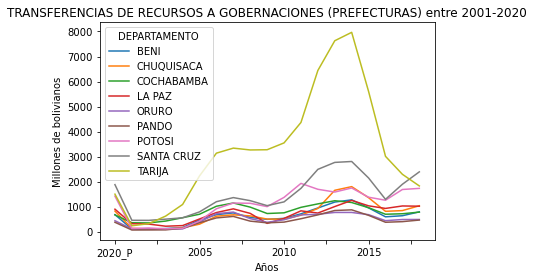

In [6]:
df_last_years.groupby(level=1).sum().T.plot()
plt.title('TRANSFERENCIAS DE RECURSOS A GOBERNACIONES (PREFECTURAS) entre 2001-2020')
plt.ylabel('Millones de bolivianos')
plt.xlabel('Años')
plt.show()

Nota: En el mes de mayo se realizó  el pago extraordinario por el Campo Incahuasi por descongelamiento en fecha 16/5/2018 de Bs163.244.029,24